In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#create card values
suits = ['S','C','H','D']
card_vals = ['A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'Q', 'K']
n_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]

In [3]:
#create a dictionary and a numpy array holding all card values and all cards
cards = {}
card_array = []
for suit in suits:
    for i in range(len(card_vals)):
        card = str(card_vals[i])+suit
        cards[card] = n_values[i]
        
x = 0
card_id = {}
pack = []
for c in cards:
    card_id[x] = c
    pack.append([x, 0])
    x += 1

In [4]:
#Shuffle the cards
def shuffle_cards(pack):    
    shuffle_order = np.arange(52)
    np.random.shuffle(shuffle_order)

    shuffled_pack = np.copy(pack)
    for card in range(len(shuffled_pack)):
        shuffled_pack[card][1] = int(shuffle_order[card])

    return(shuffled_pack[shuffled_pack[:,1].argsort()])  
    

In [5]:
#Get hand value
def get_hand_value(player, cards, card_id):
    value = []        
    for i in range(len(player)):
        value.append(cards[card_id[player[i]]])

                
    return(np.sum(value))    

In [6]:
def validation_check(hand_value):
    if hand_value > 21:
        return(0) #hand is bust
    else: return(1) #hand is legal

In [7]:
#Generate a random decision whether to play or not
def random_decision():
    return(np.random.randint(2))

In [8]:
def deal_first_hands(play_deck, cards, card_id):
    dealer = [play_deck[1][0]]
    player = [play_deck[0][0], play_deck[2][0]]
    
    dealer_value = get_hand_value(dealer, cards, card_id)
    player_value = get_hand_value(player, cards, card_id)
    
    next_card_to_deal = 3 #defined the next card to be pulled
    
    return(player, player_value, dealer, dealer_value, next_card_to_deal)
    

In [9]:
def hand_str(card_hand, card_id):
    hand = ''

    for i in range(len(card_hand)):
        if len(card_id[card_hand[i]]) < 3:
            card = card_id[card_hand[i]][0]
        else: card = card_id[card_hand[i]][0:2]
        if len(hand) == 0:
            hand = hand+card
        else: hand = hand+':'+card
        
    return hand

In [10]:
#Get hand value
def get_hand_value(player, cards, card_id):
    value = []        
    for i in range(len(player)):
        value.append(cards[card_id[player[i]]])

                
    return(np.sum(value))    

In [11]:
def validation_check(hand_value):
    if hand_value > 21:
        return(0) #hand is bust
    else: return(1) #hand is legal

In [12]:
#Establish if an ace is held and calculate what the higher hand would be 
def check_for_ace(player_hand, cards, card_id, player_value):
    
    player_value_higher = player_value
    blackjack = 0
    win = 0
    take_higher = 0

    if cards[card_id[player_hand[0]]] == 1 or cards[card_id[player_hand[1]]] == 1:
         #Yes an Ace is held define which card is an ACE
        if cards[card_id[player_hand[0]]] == 1:
            ace_card = 0
            other_card = 1
        else: 
            ace_card = 1
            other_card = 0

        #If the other card is a 10 then it's blackjack
        if cards[card_id[player_hand[other_card]]] == 10:
            blackjack = 1
            player_value = 21
            win = 1
        else: 
            #if it's not assume the card will the higher value as long as the hand doesnt bust
            take_higher = 1
            player_value_higher = player_value+10

    
    return(player_value, blackjack, win, take_higher, player_value_higher)   
    
    
#Work out if the hand can be split
#Leaving out this functionality for now and working from a standard 1 hand vs the dealer
def can_hand_be_split(cards, card_id, player_hand):
    if len(card_id[player_hand[0]]) == 3:
        card1 = card_id[player_hand[0]][0:2]
    else: card1 = card_id[player_hand[0]][0:1]

    if len(card_id[player_hand[1]]) == 3:
        card2 = card_id[player_hand[1]][0:2]
    else: card2 = card_id[player_hand[1]][0:1]

    if card1 == card2:
        split_possible = 1
    else: split_possible = 0
        
    return(split_possible)

In [13]:
def check_dealer_aces(cards, card_id, dealer_hand, dealer_value):

    aces = 0
    dealer_take_higher = 0

    #Get the amount of aces in a hand
    for i in range(len(dealer_hand)):
        if cards[card_id[dealer_hand[i]]] == 1:
            aces += 1

    if aces == 0:
        dealer_value_high = dealer_value
        return(dealer_value, dealer_value_high, dealer_take_higher)
    
    else:        
        add_on_value = 10*aces

        dealer_value_high = dealer_value+add_on_value

        if dealer_value_high > 21:
            dealer_take_higher = 0
            dealer_value_high = dealer_value
        else:
            dealer_take_higher = 1

        return(dealer_value, dealer_value_high, dealer_take_higher)

In [14]:
def new_card_engine(decision, cards, card_id, next_card_to_deal, dealer_value, player_value, play_deck, dealer_hand, player_hand, player_value_higher, take_higher):
    if decision == 0:#choice not to play
        #dealer will pull a card until at least 17 is reached
        while dealer_value < 17:
            #Get the value of the next card
            
            dealer_hand.append(play_deck[next_card_to_deal][0])
            next_card_to_deal += 1
            dealer_value = get_hand_value(dealer_hand, cards, card_id)
            

    else: #decision is made to pull a card
        
        player_hand.append(play_deck[next_card_to_deal][0])
        next_card_to_deal += 1
        player_value = get_hand_value(player_hand, cards, card_id)
        if take_higher == 1:
            player_value_higher = player_value + 10
        
            
    return(dealer_hand, dealer_value, player_hand, player_value, next_card_to_deal, player_value_higher)

In [15]:
def pull_player_card(cards, card_id, next_card_to_deal, play_deck, player_value, player_hand, player_value_higher, take_higher):

    player_hand.append(play_deck[next_card_to_deal][0])
    next_card_to_deal += 1
    player_value = get_hand_value(player_hand, cards, card_id)
    if take_higher == 1:
        player_value_higher = player_value + 10
        if player_value_higher > 21:
            player_value_higher = player_value
            take_higher = 0
    else: player_value_higher = player_value
        
    return(next_card_to_deal, player_value, player_hand, player_value_higher, take_higher)

In [16]:
def pull_dealer_card(cards, card_id, next_card_to_deal, play_deck, dealer_value, dealer_hand, dealer_value_higher, take_higher, stop):

    stop = stop
    
    dealer_hand.append(play_deck[next_card_to_deal][0])
    next_card_to_deal += 1
    dealer_value = get_hand_value(dealer_hand, cards, card_id)
    if take_higher == 1:
        dealer_value_higher = dealer_value + 10
        if dealer_value_higher > 21:
            dealer_value_higher = dealer_value
            take_higher = 0
    else: dealer_value_higher = dealer_value
        
    if dealer_value_higher > 16:
        stop = 1
        
    return(next_card_to_deal, dealer_value, dealer_hand, dealer_value_higher, take_higher, stop)

In [17]:
def has_ace(hand):
    for i in hand:
        if i == 'A':
            return(1)
    return(0)

def has_pair(hand):

    card_freq = {} 

    for i in hand: 
        if i != ':':
            if i in card_freq: 
                card_freq[i] += 1
            else: 
                card_freq[i] = 1

    for i in card_freq:
        if card_freq[i] > 1:
            return(1)
    
    return(0)

def hand_type(pair, ace):
    if pair == 1:
        return('pair')
    else:
        if ace == 1:
            return('soft')
        else: return('hard')

In [18]:
def create_false_attempts(choice_stance):
    
    if choice_stance == 'stick':
        choice_type = 1
    if choice_stance == 'play':
        choice_type = 2
    else: choice_type = 3

    start_dict = []

    hands = range(0,3)
    player_possibles = range(2, 22)
    dealer_possibles = range(1, 11)

    games_played = 0

    games_pulled = 0
    games_pull_win = 0
    games_not_pulled = 0
    games_not_pulled_win = 0

    for h in hands:
        for play in player_possibles:
            for deal in dealer_possibles:
                handstr = str(h)+':'+str(play)+':'+str(deal)
                if choice_stance == 3:
                    rand_decision = np.random.randint(2)
                else: 
                    if choice_stance == 1:
                        rand_decision = 0
                    else: rand_decision = 1

                start_dict.append([handstr, h, play, deal, games_played, games_pulled, games_pull_win, games_not_pulled, games_not_pulled_win, rand_decision ])
    
    return(start_dict)

# Run the simulation to create data

In [19]:
#Shuffle the cards


def initial_simulation(n):


    game_recording = []

    for i in range(n):

        outcome = 'start game'
        win = 0
        player_win = 0
        dealer_win = 0
        player_bust = 0
        dealer_bust = 0
        play_deck = shuffle_cards(pack)

        #deal the first hands
        player_hand, player_value, dealer_hand, dealer_value, next_card = deal_first_hands(play_deck,cards, card_id)

        #Check for an ace, or if the player has blackjack
        player_value, blackjack, win, take_higher, player_value_higher = check_for_ace(player_hand, cards, card_id, player_value)

        #check if the dealer can go higher
        dealer_value, dealer_value_high, dealer_take_higher = check_dealer_aces(cards, card_id, dealer_hand, dealer_value)

        record_first_hand = [player_value, player_value_higher, hand_str(player_hand, card_id), take_higher, blackjack, dealer_value, hand_str(dealer_hand,card_id),
                             dealer_take_higher, dealer_value_high]
        
        dealer_final = dealer_value

        #check to see if the player has won
        if win == 1:
            outcome = 'player win, blackjack'
            player_win = 1
            player_final = 21
        else:

        #if not loop through the game

            while win == 0:
                decision = random_decision()

                if decision == 1: #pull a card
                    #go through code to pull a card               
                    next_card, player_value, player_hand, player_value_higher, take_higher = pull_player_card(cards, card_id, next_card, play_deck, 
                                                                                                              player_value, player_hand, player_value_higher, take_higher)
                    #check to make sure hand isn't bust
                    if player_value_higher > 21:
                        outcome = 'dealer win, player bust'
                        player_bust = 1
                        dealer_win = 1  
                        win = 1

                if take_higher == 1:
                    player_final = player_value_higher
                else: player_final = player_value       

                if player_final > 21:
                    dealer_win = 1
                    dealer_final = dealer_value_high
                    outcome = 'dealer wins, player bust'
                    player_bust = 1
                    win = 1
                    break


                #pull dealers card
                stop = 0
                while stop == 0:
                    if dealer_value_high > 17:
                        stop = 1

                    next_card, dealer_value, dealer_hand, dealer_value_high, dealer_take_higher, stop = pull_dealer_card(cards, card_id, next_card, play_deck, dealer_value, dealer_hand,
                                                                                                              dealer_value_high, dealer_take_higher, stop)


                if dealer_take_higher == 1:
                    dealer_final = dealer_value_high
                else: dealer_final = dealer_value

                if dealer_final > 21:
                    player_win = 1
                    outcome = 'player wins, dealer bust'
                    dealer_bust = 1
                    win = 1
                    break

                if player_final > dealer_final:
                    player_win = 1
                    outcome = 'player wins, higher value'
                    win = 1
                    break
                else:
                    dealer_win = 1
                    outcome = 'dealer wins, higher value'
                    win = 1
                    break    

        #store everything in an array

        final_player_hand = hand_str(player_hand, card_id)        
        final_dealer_hand = hand_str(dealer_hand, card_id)

        player_first_hand_ace = has_ace(record_first_hand[2])
        player_first_hand_pair = has_pair(record_first_hand[2])
        player_first_hand_type = hand_type(player_first_hand_pair, player_first_hand_ace)

        player_has_ace = has_ace(final_player_hand)
        player_has_pair = has_pair(final_player_hand)
        player_hand_type = hand_type(player_has_pair, player_has_ace)

        dealer_has_ace = has_ace(final_dealer_hand)
        dealer_has_pair = has_pair(final_dealer_hand)
        dealer_hand_type = hand_type(dealer_has_pair, dealer_has_ace)

        game = [record_first_hand[0], record_first_hand[1], record_first_hand[2], player_first_hand_type, record_first_hand[3], record_first_hand[4], 
                record_first_hand[5], record_first_hand[6], record_first_hand[7], record_first_hand[8], 
                final_player_hand, player_final, final_dealer_hand, dealer_final, dealer_win, player_win, player_hand_type, dealer_hand_type, player_bust, dealer_bust, outcome]
        game_recording.append(game)
        
        #columns = ['player_start_value', 'player_start_high_value', 'player_start_hand','player_start_hand_type','player_start_high_flag', 'player_has_blackjack', 
        #   'dealer_start_value', 'dealer_start_hand','dealer_start_high_flag','dealer_start_high_value', 'player_final_hand','player_final_value',
        #  'dealer_final_hand', 'dealer_final_value', 'dealer_win', 'player_win', 'player_final_hand_type', 'dealer_final_hand_type','player_bust', 'dealer_bust','outcome']
        #data = pd.DataFrame(game_recording, columns=columns)
        
    return(np.array(game_recording))

# Analyse Data

In [73]:
def analytics(data, start_dict):
    
    #data = pd.read_csv('simulation_results_v3.csv')

    #cols = data.columns

    cols = ['player_start_value', 'player_start_high_value', 'player_start_hand','player_start_hand_type','player_start_high_flag', 'player_has_blackjack', 
           'dealer_start_value', 'dealer_start_hand','dealer_start_high_flag','dealer_start_high_value', 'player_final_hand','player_final_value',
          'dealer_final_hand', 'dealer_final_value', 'dealer_win', 'player_win', 'player_final_hand_type', 'dealer_final_hand_type','player_bust', 'dealer_bust','outcome']

    games = np.array(data)
    hand_type_dict = {'hard':0, 'soft':1, 'pair':2}
    cols_dict = {}

    for i in range(len(cols)):
        cols_dict[cols[i]] = i

    #plt.hist(games[:,-1])
    #plt.show()

    game_outcomes = np.unique(games[:,-1])

    outcomes = {}
    for i in game_outcomes:
        outcomes[i] = len(games[games[:,-1] == i])

    #print(outcomes)

    player_start_value = games[:,0].reshape(games.shape[0], 1) #player start hand value
    player_start_hand_type = [hand_type_dict[x] for x in games[:,3]]
    player_start_hand_type = np.array(player_start_hand_type)
    player_start_hand_type = player_start_hand_type.reshape(games.shape[0], 1)
    player_win_flag = games[:,15].reshape(games.shape[0], 1)
    dealer_start_value = games[:,6].reshape(games.shape[0], 1)

    player_final_value = games[:,11].reshape(games.shape[0],1)

    def func(x):
        if x[0] == x[1]:
            return(0)
        else: return(1)

    card_pulled = [func(x) for x in np.append(player_start_value, player_final_value, axis=1)]
    card_pulled = np.array(card_pulled)
    card_pulled = card_pulled.reshape(games.shape[0],1)

    a = np.append(player_start_value, player_start_hand_type, axis=1)
    a = np.append(a, dealer_start_value, axis=1)
    a = np.append(a, player_win_flag, axis=1)
    a = np.append(a, player_final_value, axis=1)
    games_summary = np.append(a, card_pulled, axis=1)
    games_summary_cols = ['player start value','player start hand type', 'dealer start value','player win flag','player final value', 'card pulled']

    unq_hand_vals = np.unique(games_summary[:,0])
    unq_hand_types = np.unique(games_summary[:,1])
    unq_dealer_vals = np.unique(games_summary[:,2])

    game_matrix = []
    for s_hand_type in unq_hand_types:
        for player in unq_hand_vals:
            for dealer in unq_dealer_vals:
                game_matrix.append([s_hand_type, player, dealer])

    game_matrix_cols = ['hand type','player value', 'dealer value']

    unique_hands = np.unique([str(games_summary[i][1])+':'+str(games_summary[i][0])+':'+str(games_summary[i][2]) for i in range(len(games_summary))])

    main_outputs = []

    for unique_type in unique_hands:
        game_type = int(unique_type[0])
        if unique_type[3] == ':':
            player_hand = int(unique_type[2:3])
        else: player_hand = int(unique_type[2:4])

        if unique_type[-2] == ':':
            dealer_hand = int(unique_type[-1])
        else: dealer_hand = int(unique_type[-2:])

        a = games_summary[games_summary[:,0] == str(player_hand)]#player_hand
        b = a[a[:,1] == str(game_type)] #hand type
        c = b[b[:,2] == str(dealer_hand)] #dealer hand
        pull = c[c[:,5] == '1'] #card pulled
        nopull = c[c[:,5] == '0'] #card not pulled



        #need to get, games played, games pulled, games pull win, games not pulled, games not pulled win, decision

        games_played = len(c)

        games_pulled = len(pull)
        games_pulled_win = len(pull[pull[:,3] == '1'])

        games_not_pulled = len(nopull)
        games_not_pulled_win = len(nopull[nopull[:,3] == '1'])

        decision = 0

         #need to get, games played, games pulled, games pull win, games not pulled, games not pulled win, decision

        main_outputs.append([unique_type, game_type, player_hand, dealer_hand, games_played, games_pulled, games_pulled_win, games_not_pulled, games_not_pulled_win, decision])


    main = np.array(main_outputs)
    new_main = []

    for i in range(len(start_dict)):
        row = start_dict[i]
        #get data from new output
        new = main[main[:,0] == row[0]]

        if len(new) == 0:
            new_main.append(row)
        else:
            row[4] = row[4] + int(new[0][4]) #games played
            row[5] = row[5] + int(new[0][5]) #games pulled
            row[6] = row[6] + int(new[0][6]) #games pulled won
            row[7] = row[7] + int(new[0][7]) #games not pulled
            row[8] = row[8] + int(new[0][8]) #games not pulled won

            if row[5] > 0 and row[7] > 0:
                if (row[6] / row[5]) > (row[8]/row[7]):
                    row[9] = 1
                else: row[9] = 0
            else:
                if row[5] > 0:
                    if row[6] / row[5] > 0.4:
                        row[9] = 1
                    else: row[9] = 0
                else:
                    if row[7] > 0:
                        if row[8] / row[7] < 0.4:
                            row[9] = 1
                        else: row[9] = 0

            new_main.append(row)

    return(new_main)

In [74]:
# A soft hand is any hand that includes an Ace
# A hard hand is any hand that does not include an Ace and is not a pair
# A pair hand is a pair

# Run the simulation to check the output from the analysis

In [75]:
def simulate_with_results(n, choices):

    #load in decision data
    #choices = np.array(pd.read_csv('output.csv'))
    
    
    choices_dict = {}
    for i in range(len(choices)):
        choices_dict[choices[i][0]] = choices[i][-1]

    hand_type_dict = {'hard':0, 'soft':1, 'pair':2}

    #game, player, dealer
    
    #Shuffle the cards
    game_recording = []

    for i in range(n):

        outcome = 'start game'
        win = 0
        player_win = 0
        dealer_win = 0
        player_bust = 0
        dealer_bust = 0
        play_deck = shuffle_cards(pack)

        #deal the first hands
        player_hand, player_value, dealer_hand, dealer_value, next_card = deal_first_hands(play_deck,cards, card_id)

        #Check for an ace, or if the player has blackjack
        player_value, blackjack, win, take_higher, player_value_higher = check_for_ace(player_hand, cards, card_id, player_value)

        #check if the dealer can go higher
        dealer_value, dealer_value_high, dealer_take_higher = check_dealer_aces(cards, card_id, dealer_hand, dealer_value)

        record_first_hand = [player_value, player_value_higher, hand_str(player_hand, card_id), take_higher, blackjack, dealer_value, hand_str(dealer_hand,card_id),
                             dealer_take_higher, dealer_value_high]
        
        dealer_final = dealer_value

        #check to see if the player has won
        if win == 1:
            outcome = 'player win, blackjack'
            player_win = 1
            player_final = 21
        else:

            while win == 0:

                hold_ace = has_ace(hand_str(player_hand, card_id))
                hold_pair = has_pair(hand_str(player_hand, card_id))
                h_type = hand_type(hold_pair, hold_ace)

                gameid = str(hand_type_dict[h_type])+':'+str(player_value)+':'+str(dealer_value)

                decision = choices_dict[gameid]

                if decision == 1: #pull a card
                    #go through code to pull a card               
                    next_card, player_value, player_hand, player_value_higher, take_higher = pull_player_card(cards, card_id, next_card, play_deck, 
                                                                                                              player_value, player_hand, player_value_higher, take_higher)
                    #check to make sure hand isn't bust
                    if player_value_higher > 21:
                        outcome = 'dealer win, player bust'
                        player_bust = 1
                        dealer_win = 1  
                        win = 1

                if take_higher == 1:
                    player_final = player_value_higher
                else: player_final = player_value       

                if player_final > 21:
                    dealer_win = 1
                    dealer_final = dealer_value_high
                    outcome = 'dealer wins, player bust'
                    player_bust = 1
                    win = 1
                    break


                #pull dealers card
                stop = 0
                while stop == 0:
                    if dealer_value_high > 17:
                        stop = 1

                    next_card, dealer_value, dealer_hand, dealer_value_high, dealer_take_higher, stop = pull_dealer_card(cards, card_id, next_card, play_deck, dealer_value, dealer_hand,
                                                                                                              dealer_value_high, dealer_take_higher, stop)

                if dealer_take_higher == 1:
                    dealer_final = dealer_value_high
                else: dealer_final = dealer_value

                if dealer_final > 21:
                    player_win = 1
                    outcome = 'player wins, dealer bust'
                    dealer_bust = 1
                    win = 1
                    break

                if player_final > dealer_final:
                    player_win = 1
                    outcome = 'player wins, higher value'
                    win = 1
                    break
                else:
                    dealer_win = 1
                    outcome = 'dealer wins, higher value'
                    win = 1
                    break    

        final_player_hand = hand_str(player_hand, card_id)        
        final_dealer_hand = hand_str(dealer_hand, card_id)

        player_first_hand_ace = has_ace(record_first_hand[2])
        player_first_hand_pair = has_pair(record_first_hand[2])
        player_first_hand_type = hand_type(player_first_hand_pair, player_first_hand_ace)

        player_has_ace = has_ace(final_player_hand)
        player_has_pair = has_pair(final_player_hand)
        player_hand_type = hand_type(player_has_pair, player_has_ace)

        dealer_has_ace = has_ace(final_dealer_hand)
        dealer_has_pair = has_pair(final_dealer_hand)
        dealer_hand_type = hand_type(dealer_has_pair, dealer_has_ace)

        game = [record_first_hand[0], record_first_hand[1], record_first_hand[2], player_first_hand_type, record_first_hand[3], record_first_hand[4], 
                record_first_hand[5], record_first_hand[6], record_first_hand[7], record_first_hand[8], 
                final_player_hand, player_final, final_dealer_hand, dealer_final, dealer_win, player_win, player_hand_type, dealer_hand_type, player_bust, dealer_bust, outcome]
        game_recording.append(game)

        #columns = ['player_start_value', 'player_start_high_value', 'player_start_hand','player_start_hand_type','player_start_high_flag', 'player_has_blackjack', 
        #       'dealer_start_value', 'dealer_start_hand','dealer_start_high_flag','dealer_start_high_value', 'player_final_hand','player_final_value',
        #      'dealer_final_hand', 'dealer_final_value', 'dealer_win', 'player_win', 'player_final_hand_type', 'dealer_final_hand_type','player_bust', 'dealer_bust','outcome']
        #data = pd.DataFrame(game_recording, columns=columns)

        
        
    return(np.array(game_recording))

the error would be

actual error rate is 48% of games
our error rate would be lost games

so lost games - actual lost games (0.48 of games played) / 0.48 of games played

In [95]:
n = 10000
x = 0
y = 0
pass_limit = 50
crr_max = 0
best_run = y
best_save = []
wins = []

starting_dictionary = create_false_attempts('stick') #play, #stick, #random

start_data = initial_simulation(n)

while x < pass_limit:
    if y == 0:
        #we want to pass the decisions back into this so they can be updated
        matrix = analytics(start_data, starting_dictionary) 
    else: matrix = analytics(attempt, matrix)
        
    attempt = simulate_with_results(n, matrix)
    games = np.array(attempt)[:,15]
    score = len(games[games == '1']) / len(games)
    
    if y > 2:
        if score > crr_max:
            crr_max = score
            best_save = matrix.copy() 
            best_run = y
    
    wins.append(score)
    
    print('Win ratio after pass',y,'was',score, )
        
    y += 1
    x += 1

print('The best pass was pass', best_run, 'with a score of', crr_max)    

Win ratio after pass 0 was 0.4258
Win ratio after pass 1 was 0.4354
Win ratio after pass 2 was 0.431
Win ratio after pass 3 was 0.4239
Win ratio after pass 4 was 0.4266
Win ratio after pass 5 was 0.4257
Win ratio after pass 6 was 0.4398
Win ratio after pass 7 was 0.4351
Win ratio after pass 8 was 0.4278
Win ratio after pass 9 was 0.4319
Win ratio after pass 10 was 0.4313
Win ratio after pass 11 was 0.4366
Win ratio after pass 12 was 0.4272
Win ratio after pass 13 was 0.4335
Win ratio after pass 14 was 0.4281
Win ratio after pass 15 was 0.4301
Win ratio after pass 16 was 0.4304
Win ratio after pass 17 was 0.4279
Win ratio after pass 18 was 0.4212
Win ratio after pass 19 was 0.426
Win ratio after pass 20 was 0.4222
Win ratio after pass 21 was 0.4347
Win ratio after pass 22 was 0.4354
Win ratio after pass 23 was 0.4363
Win ratio after pass 24 was 0.4328
Win ratio after pass 25 was 0.4272
Win ratio after pass 26 was 0.4291
Win ratio after pass 27 was 0.4324
Win ratio after pass 28 was 0.43

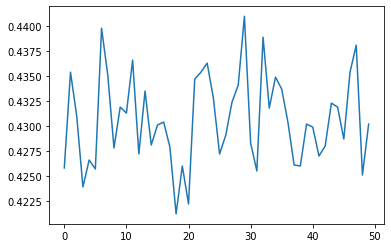

In [97]:
plt.plot(wins)

In [78]:
cols = ['unique_type', 'game_type', 'player_hand', 'dealer_hand', 'games_played', 'games_pulled', 'games_pulled_win', 'games_not_pulled', 'games_not_pulled_win', 'decision']
data_to_output = pd.DataFrame(matrix, columns=cols)
#data_to_output.to_csv('fresh_output.csv', index=False)

100

In [ ]:
a = np.array(new_main)

In [ ]:
np.sum(a[:,4].astype(int))

In [ ]:
attempt.shape

In [ ]:
np.sum(np.array(matrix)[:,4].astype(int))